# **Experiment Notebook**



In [1025]:
# Do not modify this code
!pip install -q utstd

from utstd.ipyrenders import *

In [1026]:
# Do not modify this code
import warnings
warnings.simplefilter(action='ignore')

## 0. Import Packages

In [1027]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

In [1028]:
pip install --index-url https://test.pypi.org/simple/ my_krml_25677648==2025.0.1.8

Looking in indexes: https://test.pypi.org/simple/
Note: you may need to restart the kernel to use updated packages.


In [1029]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import altair as alt

---
## A. Project Description


In [1030]:
student_name = "Fang Yee Tan"
student_id = "25677648"

In [1031]:
# Do not modify this code
print_tile(size="h1", key='student_name', value=student_name)

In [1032]:
# Do not modify this code
print_tile(size="h1", key='student_id', value=student_id)

---
## B. Business Understanding

In [1033]:
business_use_case_description = """The objective of this project is to develop a robust machine learning model capable of accurately predicting the likelihood of rainfall exactly seven days in advance for Sydney, Australia. Weather variability profoundly affects industries such as agriculture, logistics and event management, where the ability to anticipate rainfall directly impacts operational efficiency, risk management and resource allocation. By leveraging historical daily weather data spanning 2014 to 2024, the model will produce binary forecasts (rain or no rain) using a range of classification algorithms, with the best-performing model deployed as an API. This API will integrate seamlessly into the Open Meteo platform, providing businesses and users with accessible and reliable 7-day rainfall predictions. For agriculture, this enables optimised crop scheduling and irrigation planning; for logistics, it enhances route planning and supply chain resilience; and for event management, it facilitates contingency planning and venue selection. The capacity to make data-driven decisions based on advanced AI forecasting offers measurable improvements in operational planning and mitigates uncertainties associated with weather-dependent activities. Ultimately, this project strengthens the Open Meteo platform by positioning it as a comprehensive, data-driven decision support tool for industries where weather conditions critically influence success.
"""

In [1034]:
# Do not modify this code
print_tile(size="h3", key='business_use_case_description', value=business_use_case_description)

In [1035]:
business_objectives = """Accurate rainfall prediction models offer substantial benefits to a diverse array of stakeholders. By providing reliable forecasts, such models enable improved planning and optimised resource allocation, which help weather-dependent industries minimise operational disruptions, reduce avoidable costs, and enhance worker safety. Furthermore, precise rainfall predictions contribute to heightened public awareness and preparedness for sudden rain events, supporting community resilience. Conversely, inaccurate forecasts carry significant risks: false positives may lead to unnecessary delays and financial losses, while false negatives can jeopardise worker safety and result in missed opportunities for proactive mitigation. Therefore, the primary business objectives of this project are to maximise forecast accuracy to support effective decision-making, mitigate operational risks, and deliver measurable value to industry users and the broader community.
"""

In [1036]:
# Do not modify this code
print_tile(size="h3", key='business_objectives', value=business_objectives)

In [1037]:
stakeholders_expectations_explanations = """Rainfall predictions generated by the model are expected to support informed decision-making across a wide range of contexts and user groups. Individual users rely on accurate forecasts to plan personal activities such as weekends and outdoor events, thereby enhancing convenience and satisfaction. Event planners and project managers utilise these predictions to strategically schedule tasks, minimising disruptions caused by adverse weather. Weather-sensitive industries, including agriculture, logistics and event management, anticipate that these forecasts will facilitate meticulous operational planning, mitigate risks, and improve worker safety by avoiding outdoor activities during rainy periods. The stakeholder base therefore includes the general public, industry professionals, event organisers, and others whose activities are directly affected by weather conditions. Ultimately, stakeholders expect these rainfall forecasts to enable more effective planning, reduce operational disruptions, minimise financial losses, and enhance overall safety outcomes.
"""

In [1038]:
# Do not modify this code
print_tile(size="h3", key='stakeholders_expectations_explanations', value=stakeholders_expectations_explanations)

---
## C. Data Understanding

### C.1   Load Datasets


In [1039]:
import openmeteo_requests

import pandas as pd
import requests_cache
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": -33.8678,
	"longitude": 151.2073,
	"start_date": "2014-01-01",
	"end_date": "2024-12-31",
	"daily": ["temperature_2m_mean", "weather_code", "daylight_duration", "sunshine_duration", "temperature_2m_max", "temperature_2m_min", "et0_fao_evapotranspiration_sum", "wind_speed_10m_mean", "wind_speed_10m_min", "relative_humidity_2m_mean", "relative_humidity_2m_max", "dew_point_2m_mean", "soil_moisture_0_to_7cm_mean", "soil_moisture_28_to_100cm_mean", "soil_moisture_7_to_28cm_mean", "dew_point_2m_min", "vapour_pressure_deficit_max", "wind_gusts_10m_mean", "wind_gusts_10m_min", "relative_humidity_2m_min", "wind_direction_10m_dominant", "wind_gusts_10m_max", "wind_speed_10m_max", "cloud_cover_mean", "cloud_cover_max", "cloud_cover_min", "dew_point_2m_max", "rain_sum", "pressure_msl_mean", "pressure_msl_max", "pressure_msl_min"],
	"timezone": "auto",
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates: {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation: {response.Elevation()} m asl")
print(f"Timezone: {response.Timezone()}{response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0: {response.UtcOffsetSeconds()}s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_temperature_2m_mean = daily.Variables(0).ValuesAsNumpy()
daily_weather_code = daily.Variables(1).ValuesAsNumpy()
daily_daylight_duration = daily.Variables(2).ValuesAsNumpy()
daily_sunshine_duration = daily.Variables(3).ValuesAsNumpy()
daily_temperature_2m_max = daily.Variables(4).ValuesAsNumpy()
daily_temperature_2m_min = daily.Variables(5).ValuesAsNumpy()
daily_et0_fao_evapotranspiration_sum = daily.Variables(6).ValuesAsNumpy()
daily_wind_speed_10m_mean = daily.Variables(7).ValuesAsNumpy()
daily_wind_speed_10m_min = daily.Variables(8).ValuesAsNumpy()
daily_relative_humidity_2m_mean = daily.Variables(9).ValuesAsNumpy()
daily_relative_humidity_2m_max = daily.Variables(10).ValuesAsNumpy()
daily_dew_point_2m_mean = daily.Variables(11).ValuesAsNumpy()
daily_soil_moisture_0_to_7cm_mean = daily.Variables(12).ValuesAsNumpy()
daily_soil_moisture_28_to_100cm_mean = daily.Variables(13).ValuesAsNumpy()
daily_soil_moisture_7_to_28cm_mean = daily.Variables(14).ValuesAsNumpy()
daily_dew_point_2m_min = daily.Variables(15).ValuesAsNumpy()
daily_vapour_pressure_deficit_max = daily.Variables(16).ValuesAsNumpy()
daily_wind_gusts_10m_mean = daily.Variables(17).ValuesAsNumpy()
daily_wind_gusts_10m_min = daily.Variables(18).ValuesAsNumpy()
daily_relative_humidity_2m_min = daily.Variables(19).ValuesAsNumpy()
daily_wind_direction_10m_dominant = daily.Variables(20).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(21).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(22).ValuesAsNumpy()
daily_cloud_cover_mean = daily.Variables(23).ValuesAsNumpy()
daily_cloud_cover_max = daily.Variables(24).ValuesAsNumpy()
daily_cloud_cover_min = daily.Variables(25).ValuesAsNumpy()
daily_dew_point_2m_max = daily.Variables(26).ValuesAsNumpy()
daily_rain_sum = daily.Variables(27).ValuesAsNumpy()
daily_pressure_msl_mean = daily.Variables(28).ValuesAsNumpy()
daily_pressure_msl_max = daily.Variables(29).ValuesAsNumpy()
daily_pressure_msl_min = daily.Variables(30).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}

daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["weather_code"] = daily_weather_code
daily_data["daylight_duration"] = daily_daylight_duration
daily_data["sunshine_duration"] = daily_sunshine_duration
daily_data["temperature_2m_max"] = daily_temperature_2m_max
daily_data["temperature_2m_min"] = daily_temperature_2m_min
daily_data["et0_fao_evapotranspiration_sum"] = daily_et0_fao_evapotranspiration_sum
daily_data["wind_speed_10m_mean"] = daily_wind_speed_10m_mean
daily_data["wind_speed_10m_min"] = daily_wind_speed_10m_min
daily_data["relative_humidity_2m_mean"] = daily_relative_humidity_2m_mean
daily_data["relative_humidity_2m_max"] = daily_relative_humidity_2m_max
daily_data["dew_point_2m_mean"] = daily_dew_point_2m_mean
daily_data["soil_moisture_0_to_7cm_mean"] = daily_soil_moisture_0_to_7cm_mean
daily_data["soil_moisture_28_to_100cm_mean"] = daily_soil_moisture_28_to_100cm_mean
daily_data["soil_moisture_7_to_28cm_mean"] = daily_soil_moisture_7_to_28cm_mean
daily_data["dew_point_2m_min"] = daily_dew_point_2m_min
daily_data["vapour_pressure_deficit_max"] = daily_vapour_pressure_deficit_max
daily_data["wind_gusts_10m_mean"] = daily_wind_gusts_10m_mean
daily_data["wind_gusts_10m_min"] = daily_wind_gusts_10m_min
daily_data["relative_humidity_2m_min"] = daily_relative_humidity_2m_min
daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["cloud_cover_mean"] = daily_cloud_cover_mean
daily_data["cloud_cover_max"] = daily_cloud_cover_max
daily_data["cloud_cover_min"] = daily_cloud_cover_min
daily_data["dew_point_2m_max"] = daily_dew_point_2m_max
daily_data["rain_sum"] = daily_rain_sum
daily_data["pressure_msl_mean"] = daily_pressure_msl_mean
daily_data["pressure_msl_max"] = daily_pressure_msl_max
daily_data["pressure_msl_min"] = daily_pressure_msl_min

df = pd.DataFrame(data = daily_data)

Coordinates: -33.84885787963867°N 151.1955108642578°E
Elevation: 51.0 m asl
Timezone: b'Australia/Sydney'b'GMT+10'
Timezone difference to GMT+0: 36000s


In [1040]:
from my_krml_25677648.data.sets import eda_summary

In [1041]:
# Explore df
eda_summary(df)

HEAD (First 5 Rows)

                       date  temperature_2m_mean  weather_code  \
0 2013-12-31 14:00:00+00:00            22.197580          51.0   
1 2014-01-01 14:00:00+00:00            24.607996           3.0   
2 2014-01-02 14:00:00+00:00            21.947584          51.0   
3 2014-01-03 14:00:00+00:00            21.497583           2.0   
4 2014-01-04 14:00:00+00:00            22.468416          51.0   

   daylight_duration  sunshine_duration  temperature_2m_max  \
0       51688.320312       36944.875000           25.870499   
1       51655.121094       23192.041016           33.320499   
2       51619.085938       27951.164062           24.570499   
3       51580.242188       48363.488281           24.270500   
4       51538.632812       48069.636719           26.370499   

   temperature_2m_min  et0_fao_evapotranspiration_sum  wind_speed_10m_mean  \
0           19.070499                        5.013660             9.695022   
1           21.020500                        4.

### C.2 Define Target variable

In [1042]:
# Create a variable 'precipitation_in_7_days', which is the rainfall 7 days from a given date
df['precipitation_in_7_days'] = df['rain_sum'].shift(-7)

# Create the target variable: 1 if it will rain (precipitation > 0 mm), else 0
df['rain_or_not'] = df['precipitation_in_7_days'].apply(lambda x: 1 if x > 0 else 0)

In [1043]:
# Last 10 rows of df
df.tail(10)

,date,temperature_2m_mean,weather_code,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,et0_fao_evapotranspiration_sum,wind_speed_10m_mean,wind_speed_10m_min,...,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_max,rain_sum,pressure_msl_mean,pressure_msl_max,pressure_msl_min,precipitation_in_7_days,rain_or_not
4008,2024-12-21 14:00:00+00:00,22.035416,51.0,51860.664062,29436.945312,24.887499,19.837500,4.289347,11.684125,1.835647,...,63.791668,100.0,3.0,20.887499,0.2,1006.137451,1010.299988,1001.200012,0.0,0
4009,2024-12-22 14:00:00+00:00,22.908333,3.0,51856.140625,48617.746094,28.937500,18.287500,6.802649,11.640549,2.167487,...,34.000000,100.0,0.0,20.887499,0.0,1001.937500,1008.099976,998.299988,0.3,1
4010,2024-12-23 14:00:00+00:00,19.808332,3.0,51848.464844,48610.832031,22.537500,15.837500,6.487644,12.891021,5.983477,...,5.791667,89.0,0.0,12.937500,0.0,1011.550049,1015.700012,1007.700012,0.0,0
4011,2024-12-24 14:00:00+00:00,21.368750,0.0,51837.652344,48601.023438,27.187500,16.137499,6.146514,9.999595,1.988165,...,0.916667,8.0,0.0,17.687500,0.0,1015.845886,1017.700012,1014.200012,NaN,0
4012,2024-12-25 14:00:00+00:00,22.552084,3.0,51823.750000,48000.613281,27.037500,16.837500,6.264203,15.707917,2.052316,...,13.125000,99.0,0.0,18.787500,0.0,1011.941711,1016.299988,1007.099976,NaN,0
4013,2024-12-26 14:00:00+00:00,26.202085,53.0,51806.777344,33789.968750,35.187500,20.887499,6.296452,16.679815,8.211235,...,43.500000,100.0,0.0,19.487499,0.8,1003.516663,1007.299988,1000.500000,NaN,0
4014,2024-12-27 14:00:00+00:00,21.352081,51.0,51786.785156,48554.492188,24.037500,18.587500,5.180197,12.241256,7.486788,...,33.875000,96.0,0.0,17.037500,0.9,1009.345947,1011.400024,1007.200012,NaN,0
4015,2024-12-28 14:00:00+00:00,22.214584,1.0,51763.792969,48533.378906,27.887499,16.937500,6.468780,10.361734,3.054701,...,7.166667,44.0,0.0,17.387499,0.0,1014.200012,1018.500000,1011.000000,NaN,0
4016,2024-12-29 14:00:00+00:00,22.462500,51.0,51737.851562,48509.531250,25.587500,19.737499,5.375723,12.572087,8.936778,...,41.833332,100.0,6.0,18.387499,0.3,1017.649963,1020.500000,1015.099976,NaN,0
4017,2024-12-30 14:00:00+00:00,22.993752,3.0,51708.988281,42930.703125,26.487499,18.737499,5.312834,9.582100,1.310420,...,60.375000,100.0,0.0,18.937500,0.0,1014.466614,1015.700012,1013.099976,NaN,0


In [1044]:
# Drop rows where 'precipitation_in_7_days' is null
df.dropna(subset=['precipitation_in_7_days'], inplace=True)

In [1045]:
# Last 10 rows of df
df.tail(10)

,date,temperature_2m_mean,weather_code,daylight_duration,sunshine_duration,temperature_2m_max,temperature_2m_min,et0_fao_evapotranspiration_sum,wind_speed_10m_mean,wind_speed_10m_min,...,cloud_cover_mean,cloud_cover_max,cloud_cover_min,dew_point_2m_max,rain_sum,pressure_msl_mean,pressure_msl_max,pressure_msl_min,precipitation_in_7_days,rain_or_not
4001,2024-12-14 14:00:00+00:00,23.512499,51.0,51800.867188,45431.066406,26.387499,20.987499,5.106747,10.344865,2.545584,...,67.500000,100.0,4.0,21.337500,0.500000,1011.487549,1014.500000,1008.700012,0.2,1
4002,2024-12-15 14:00:00+00:00,24.477083,51.0,51819.523438,44703.925781,28.387499,21.837500,5.735040,13.842854,3.462369,...,32.166668,100.0,0.0,21.387499,0.400000,1012.604187,1015.099976,1010.099976,0.0,0
4003,2024-12-16 14:00:00+00:00,25.910418,3.0,51834.773438,46415.132812,33.587502,20.187500,6.822017,15.718639,8.085988,...,36.958332,100.0,0.0,21.087500,0.000000,1007.416565,1011.700012,1003.400024,0.0,0
4004,2024-12-17 14:00:00+00:00,19.789583,65.0,51846.558594,28535.900391,21.187500,18.587500,4.245400,24.286615,17.688606,...,75.416664,100.0,17.0,17.437500,18.900003,1016.062561,1019.299988,1010.900024,0.0,0
4005,2024-12-18 14:00:00+00:00,20.035418,51.0,51854.968750,48615.898438,22.687500,17.787500,5.528263,15.245507,9.224011,...,47.625000,99.0,5.0,13.737499,0.200000,1017.699951,1019.400024,1016.099976,0.0,0
4006,2024-12-19 14:00:00+00:00,19.704168,2.0,51860.105469,48620.832031,23.187500,15.387500,5.755971,9.855006,1.808978,...,13.125000,71.0,0.0,16.037500,0.000000,1012.229187,1015.799988,1009.099976,0.8,1
4007,2024-12-20 14:00:00+00:00,21.762499,51.0,51861.992188,48622.777344,29.037500,15.837500,5.834490,9.155691,3.107282,...,19.916666,100.0,0.0,17.687500,0.500000,1008.329102,1010.900024,1006.200012,0.9,1
4008,2024-12-21 14:00:00+00:00,22.035416,51.0,51860.664062,29436.945312,24.887499,19.837500,4.289347,11.684125,1.835647,...,63.791668,100.0,3.0,20.887499,0.200000,1006.137451,1010.299988,1001.200012,0.0,0
4009,2024-12-22 14:00:00+00:00,22.908333,3.0,51856.140625,48617.746094,28.937500,18.287500,6.802649,11.640549,2.167487,...,34.000000,100.0,0.0,20.887499,0.000000,1001.937500,1008.099976,998.299988,0.3,1
4010,2024-12-23 14:00:00+00:00,19.808332,3.0,51848.464844,48610.832031,22.537500,15.837500,6.487644,12.891021,5.983477,...,5.791667,89.0,0.0,12.937500,0.000000,1011.550049,1015.700012,1007.700012,0.0,0


In [1046]:
# Drop column 'precipitation_in_7_days'
df.drop(columns=['precipitation_in_7_days'], inplace=True)

In [1047]:
target_definition_explanations = """This project aims to develop a predictive model to determine whether rainfall will occur in Sydney exactly seven days after a given date, formulated as a binary classification task. To facilitate this, a new variable named precipitation_in_7_days is created to represent the amount of precipitation recorded seven days after each observation date. The target variable rain or not is defined such that any precipitation value above 0 millimeters is labeled as 1, indicating rain, while values equal to or below 0 millimeters are labeled as 0, indicating no rain. This approach captures all rainfall events regardless of intensity, ensuring that even light precipitation is included in the prediction.
"""

In [1048]:
# Do not modify this code
print_tile(size="h3", key='target_definition_explanations', value=target_definition_explanations)

### C.3 Create Target variable

In [1049]:
target_name = 'rain_or_not'

### C.4 Explore Target variable

In [1050]:
from my_krml_25677648.data.sets import explore_feature_summary

In [1051]:
# Missing values, duplicates and unique values
explore_feature_summary('rain_or_not', df)

{'Missing values': np.int64(0),
 'Duplicate values': np.int64(4009),
 'Unique values count': 2,
 'Unique values (sample)': array([1, 0])}

In [1052]:
# Number of unique values of target variable
df['rain_or_not'].value_counts()

rain_or_not
1    2202
0    1809
Name: count, dtype: int64

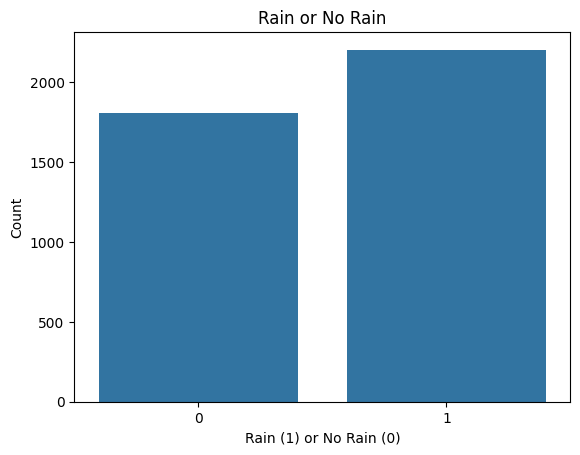

In [1053]:
# Distribution of rain_or_not
sns.countplot(x='rain_or_not', data=df)
plt.title('Rain or No Rain')
plt.xlabel('Rain (1) or No Rain (0)')
plt.ylabel('Count')
plt.show()

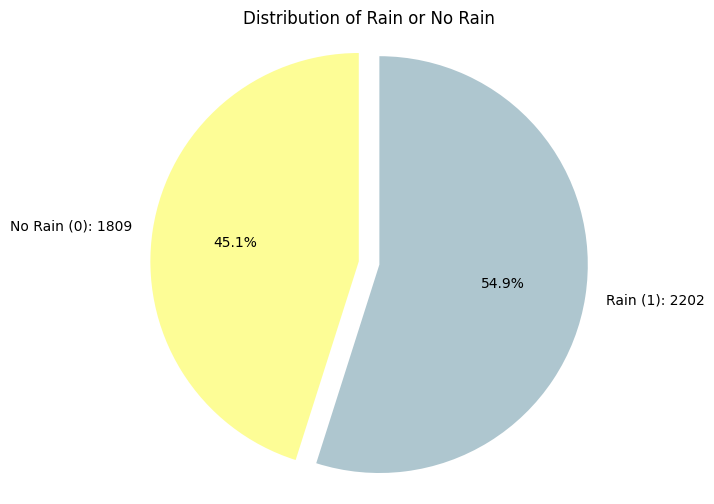

In [1054]:
# Get value counts safely
counts = df['rain_or_not'].value_counts()

# Handle the case where values might be strings instead of integers
no_rain_count = counts.get(0, counts.get('0', 0))
rain_count = counts.get(1, counts.get('1', 0))

# Prepare labels and colors
labels = [f'No Rain (0): {no_rain_count}', f'Rain (1): {rain_count}']
colors = ['#fdfd96', '#aec6cf']
sizes = [no_rain_count, rain_count]

# Plot
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
        startangle=90, explode=(0, 0.1))
plt.title('Distribution of Rain or No Rain')
plt.axis('equal')
plt.show()

In [1055]:
target_distribution_explanations = """The target variable, rain_or_not, shows a slight class imbalance, with 2202 instances of rain compared to 1809 instances of no rain. This imbalance may lead the model to favor predictions for the majority class (rain), potentially reducing its ability to accurately identify no-rain events. As a result, relying solely on accuracy as a performance metric is insufficient. Instead, more balanced metrics such as precision, recall and the F1-score should be prioritised to provide a more meaningful evaluation of the model's performance. To address this imbalance, applying class weighting during model training can help the model generalise better to the minority class, improving its overall predictive capability.
"""

In [1056]:
# Do not modify this code
print_tile(size="h3", key='target_distribution_explanations', value=target_distribution_explanations)

### C.5 Explore Feature of Interest `temperature_2m_mean `

In [1057]:
df['temperature_2m_mean'].describe()

count    4011.000000
mean       17.498573
std         4.291630
min         7.439583
25%        13.765459
50%        17.658335
75%        20.964417
max        30.516668
Name: temperature_2m_mean, dtype: float64

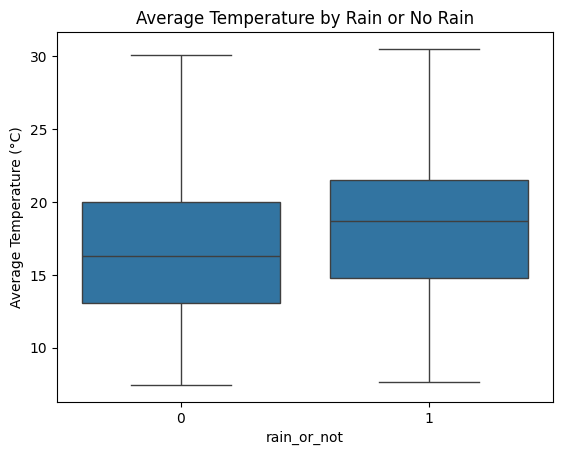

In [1058]:
# Distribution of Average Temperature by Rain or No Rain
sns.boxplot(x='rain_or_not', y='temperature_2m_mean', data=df)
plt.title('Average Temperature by Rain or No Rain')
plt.ylabel('Average Temperature (°C)')
plt.show()

In [1059]:
feature_1_insights = """The analysis of average temperature on days preceding rainfall shows that these days generally exhibit a slightly higher median temperature, along with increased lower and upper quartile values, compared to days not followed by rain. This suggests a subtle association where warmer conditions may increase the likelihood of rainfall occurring seven days later in Sydney. However, the difference in temperature distributions between rainy and non-rainy days is relatively minor, indicating that average temperature alone is not a strong predictor of future rainfall. The limited distinction between the two groups underscores the difficulty of relying solely on this feature for accurate rainfall prediction."""

In [1060]:
# Do not modify this code
print_tile(size="h3", key='feature_1_insights', value=feature_1_insights)

### C.6 Explore Feature of Interest `relative_humidity_2m_mean`

In [1061]:
df['relative_humidity_2m_mean'].describe()

count    4011.000000
mean       73.051979
std        11.025699
min        23.854151
25%        66.652519
50%        74.916649
75%        81.211967
max        95.974464
Name: relative_humidity_2m_mean, dtype: float64

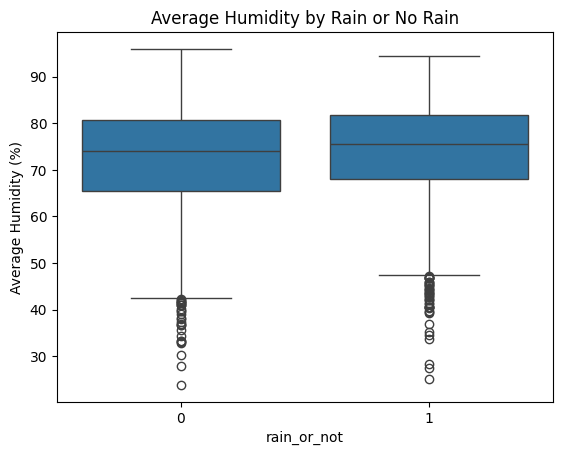

In [1062]:
# Distribution of Average Humidity by Rain or No Rain
sns.boxplot(x='rain_or_not', y='relative_humidity_2m_mean', data=df)
plt.title('Average Humidity by Rain or No Rain')
plt.ylabel('Average Humidity (%)')
plt.show()

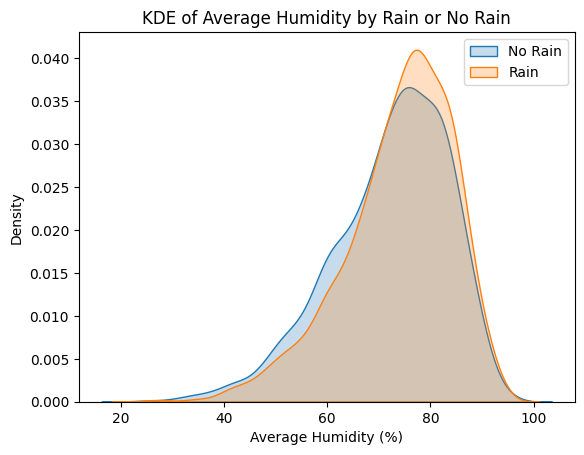

In [1063]:
# KDE plot of relative_humidity_2m_mean
sns.kdeplot(data=df[df['rain_or_not']==0]['relative_humidity_2m_mean'], label='No Rain', shade=True)
sns.kdeplot(data=df[df['rain_or_not']==1]['relative_humidity_2m_mean'], label='Rain', shade=True)
plt.title('KDE of Average Humidity by Rain or No Rain')
plt.xlabel('Average Humidity (%)')
plt.legend()
plt.show()

In [1064]:
feature_2_insights = """An analysis of the relative_humidity_2m_mean feature reveals only a slight difference in distribution between days followed by rain and those that are not. Both the boxplot and KDE plot suggest a subtle trend in which no-rain days tend to have lower humidity levels, while rain days are associated with slightly higher humidity. However, this distinction is not clearly defined. The KDE plot, in particular, reveals a significant overlap between the two classes, indicating that any association between relative humidity and rainfall occurring seven days later is weak. As such, while this feature may contribute marginally to the model’s predictive capability, it lacks strong discriminatory power on its own and would need to be used in conjunction with other, more informative variables."""

In [1065]:
# Do not modify this code
print_tile(size="h3", key='feature_2_insights', value=feature_2_insights)

### C.7 Explore Feature of Interest `cloud_cover_mean `


In [1066]:
df['cloud_cover_mean'].describe()

count    4011.000000
mean       48.318779
std        29.238104
min         0.000000
25%        24.541666
50%        47.416668
75%        71.708336
max       100.000000
Name: cloud_cover_mean, dtype: float64

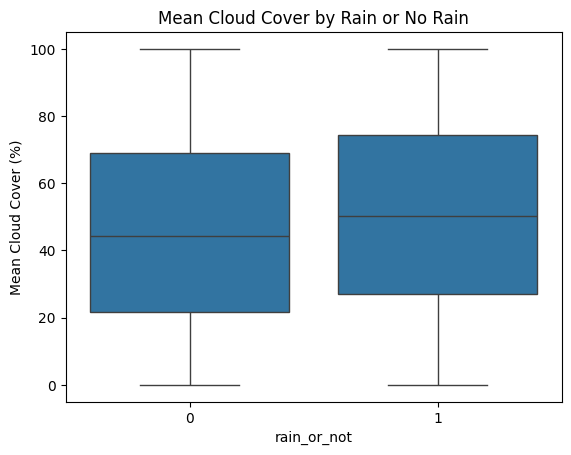

In [1067]:
# Distribution of Mean Cloud Cover by Rain or No Rain
sns.boxplot(x='rain_or_not', y='cloud_cover_mean', data=df)
plt.title('Mean Cloud Cover by Rain or No Rain')
plt.ylabel('Mean Cloud Cover (%)')
plt.show()

In [1068]:
feature_3_insights = """The cloud_cover_mean feature shows a slightly higher median and interquartile range on days followed by rain compared to no-rain days, suggesting a weak positive relationship between increased cloud cover and upcoming rainfall. This aligns with meteorological understanding, as cloud formation often precedes precipitation. However, the overlap in distributions indicates limited discriminatory power. Due to its variability and potential noise, cloud cover should be used alongside other features to improve predictive accuracy for rainfall events seven days in advance."""

In [1069]:
# Do not modify this code
print_tile(size="h3", key='feature_3_insights', value=feature_3_insights)

---
## D. Feature Selection


### D.1 Approach "Correlation Analysis"


In [1070]:
# --- PARAMETERS ---
target_col = 'rain_or_not'
corr_threshold = 0.90  # Threshold for highly correlated features

# --- 1. PLOT CORRELATION HEATMAP OF ALL FEATURES ---
def plot_correlation_heatmap(data):
    corr_matrix = data.corr()
    plt.figure(figsize=(24, 20))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap of Features', fontsize=18)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

# --- 2. PRINT CORRELATION OF ALL FEATURES WITH TARGET ---
def print_target_correlation(data, target):
    target_corr = data.corr()[target].sort_values(ascending=False)
    print(f"Correlation of features with target '{target}':")
    print(target_corr)
    return target_corr

# --- 3. IDENTIFY AND DROP HIGHLY CORRELATED FEATURES BASED ON TARGET CORRELATION ---
def drop_highly_correlated_features(data, target, threshold):
    numerical_features = data.select_dtypes(include='number').drop(columns=[target])
    corr_matrix = numerical_features.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    target_corr = data[numerical_features.columns].apply(lambda col: data[target].corr(col))

    to_drop = set()
    correlated_pairs = upper.stack().loc[lambda x: x > threshold].index.tolist()
    for col1, col2 in correlated_pairs:
        if col1 in to_drop or col2 in to_drop:
            continue
        if abs(target_corr[col1]) > abs(target_corr[col2]):
            to_drop.add(col2)
        else:
            to_drop.add(col1)

    reduced_df = data.drop(columns=to_drop)
    print(f"Dropped {len(to_drop)} features due to high correlation above {threshold}:")
    print(to_drop)
    return reduced_df, to_drop

# --- 4. FIND AND DISPLAY HIGHLY CORRELATED FEATURE PAIRS ---
def find_highly_correlated_pairs(data, target, threshold):
    numerical_df = data.select_dtypes(include='number').drop(columns=[target])
    corr_matrix = numerical_df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    high_corr_pairs = [
        (col1, col2, upper.loc[col1, col2])
        for col1 in upper.columns
        for col2 in upper.index
        if pd.notnull(upper.loc[col1, col2]) and upper.loc[col1, col2] > threshold
    ]
    
    high_corr_df = pd.DataFrame(high_corr_pairs, columns=["Feature_1", "Feature_2", "Correlation"])
    high_corr_df = high_corr_df.sort_values(by="Correlation", ascending=False).reset_index(drop=True)
    
    print(f"Highly correlated feature pairs (|corr| > {threshold}):")
    print(high_corr_df)
    
    return high_corr_df

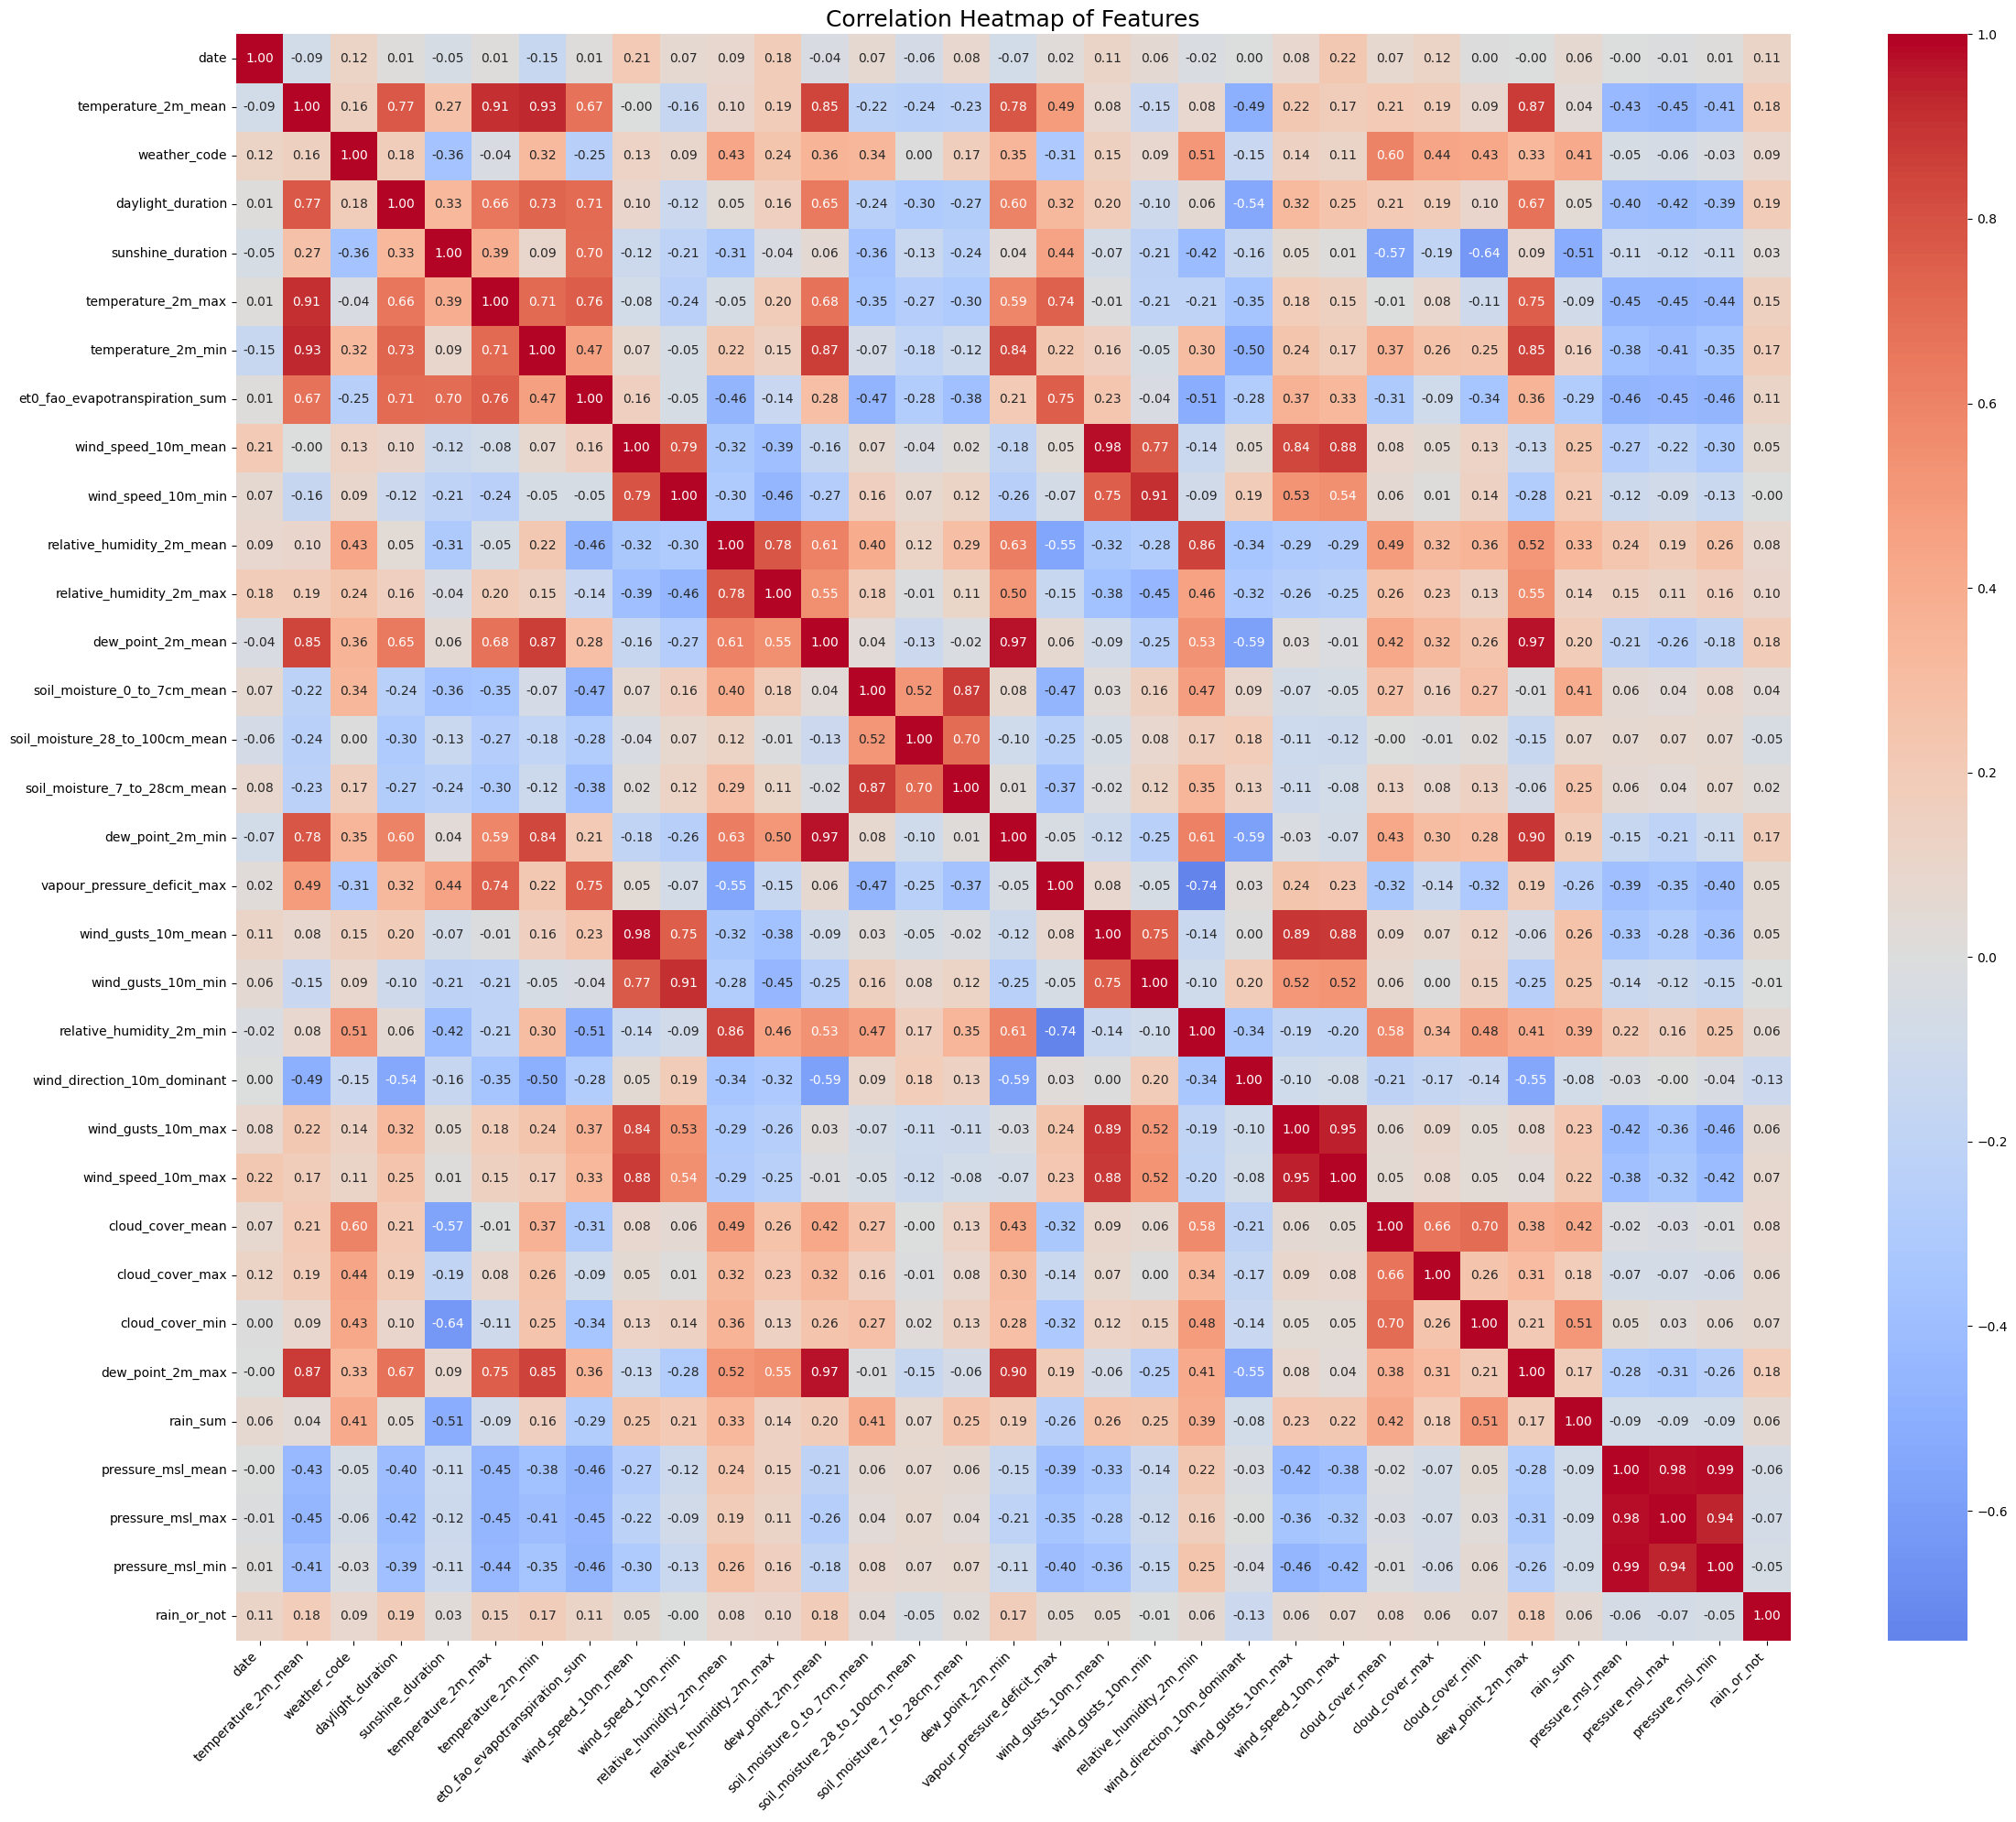

In [1071]:
# Plot correlation heatmap
plot_correlation_heatmap(df)

In [1072]:
# Print correlations with target
target_correlations = print_target_correlation(df, target_col)

Correlation of features with target 'rain_or_not':
rain_or_not                       1.000000
daylight_duration                 0.188063
dew_point_2m_mean                 0.184017
dew_point_2m_max                  0.182039
temperature_2m_mean               0.180212
dew_point_2m_min                  0.173195
temperature_2m_min                0.170683
temperature_2m_max                0.152487
et0_fao_evapotranspiration_sum    0.115000
date                              0.113896
relative_humidity_2m_max          0.098788
weather_code                      0.086772
cloud_cover_mean                  0.076785
relative_humidity_2m_mean         0.075900
wind_speed_10m_max                0.071525
cloud_cover_min                   0.067067
cloud_cover_max                   0.062335
wind_gusts_10m_max                0.058375
relative_humidity_2m_min          0.057791
rain_sum                          0.057768
wind_gusts_10m_mean               0.051895
vapour_pressure_deficit_max       0.050553
win

In [1073]:
# Drop highly correlated features
df_reduced, dropped_features = drop_highly_correlated_features(df, target_col, corr_threshold)

Dropped 9 features due to high correlation above 0.9:
{'pressure_msl_min', 'dew_point_2m_max', 'dew_point_2m_min', 'temperature_2m_max', 'wind_gusts_10m_max', 'wind_speed_10m_min', 'wind_speed_10m_mean', 'pressure_msl_mean', 'temperature_2m_min'}


In [1074]:
# Display pairs of highly correlated features before dropping
high_corr_pairs_df = find_highly_correlated_pairs(df, target_col, corr_threshold)

Highly correlated feature pairs (|corr| > 0.9):
             Feature_1            Feature_2  Correlation
0    pressure_msl_mean     pressure_msl_min     0.986274
1  wind_speed_10m_mean  wind_gusts_10m_mean     0.977547
2    pressure_msl_mean     pressure_msl_max     0.975973
3    dew_point_2m_mean     dew_point_2m_min     0.968900
4    dew_point_2m_mean     dew_point_2m_max     0.967537
5   wind_gusts_10m_max   wind_speed_10m_max     0.950555
6     pressure_msl_max     pressure_msl_min     0.935228
7  temperature_2m_mean   temperature_2m_min     0.927960
8  temperature_2m_mean   temperature_2m_max     0.908824
9   wind_speed_10m_min   wind_gusts_10m_min     0.906693


In [1075]:
feature_selection_1_insights = """This feature selection approach is based on correlation analysis to reduce multicollinearity in the dataset. It first visualises the correlation between all numerical features using a heatmap, then prints how strongly each feature is correlated with the target variable (rain_or_not). It identifies pairs of features that are highly correlated (above a threshold of 0.90) and drops the less relevant feature from each pair, keeping the one that is more strongly correlated with the target. This helps eliminate redundant features while preserving predictive power. As a result, the process improves both model performance and interpretability.
"""

In [1076]:
# Do not modify this code
print_tile(size="h3", key='feature_selection_1_insights', value=feature_selection_1_insights)

---
## E. Data Preparation

In [1077]:
df_clean = df_reduced.copy()
df_clean

,date,temperature_2m_mean,weather_code,daylight_duration,sunshine_duration,et0_fao_evapotranspiration_sum,relative_humidity_2m_mean,relative_humidity_2m_max,dew_point_2m_mean,soil_moisture_0_to_7cm_mean,...,wind_gusts_10m_min,relative_humidity_2m_min,wind_direction_10m_dominant,wind_speed_10m_max,cloud_cover_mean,cloud_cover_max,cloud_cover_min,rain_sum,pressure_msl_max,rain_or_not
0,2013-12-31 14:00:00+00:00,22.197580,51.0,51688.320312,36944.875000,5.013660,74.283485,88.191528,17.216333,0.097125,...,6.480000,56.672028,50.980602,19.721298,90.625000,100.0,41.0,0.4,1016.599976,1
1,2014-01-01 14:00:00+00:00,24.607996,3.0,51655.121094,23192.041016,4.933341,67.645233,86.262321,17.212168,0.086083,...,11.159999,29.363708,252.678192,23.141029,90.500000,100.0,1.0,0.0,1007.500000,1
2,2014-01-02 14:00:00+00:00,21.947584,51.0,51619.085938,27951.164062,3.671144,77.378288,92.547340,17.741335,0.084500,...,6.480000,66.893669,70.074326,17.902534,51.583332,100.0,0.0,0.9,1007.299988,1
3,2014-01-03 14:00:00+00:00,21.497583,2.0,51580.242188,48363.488281,5.142480,72.630409,94.254036,16.226751,0.079625,...,8.640000,55.943367,135.078217,18.057508,12.416667,69.0,0.0,0.0,1009.099976,0
4,2014-01-04 14:00:00+00:00,22.468416,51.0,51538.632812,48069.636719,5.226202,73.512062,85.453674,17.326750,0.075750,...,8.280000,54.870174,48.845158,26.795223,21.625000,66.0,0.0,0.1,1010.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4006,2024-12-19 14:00:00+00:00,19.704168,2.0,51860.105469,48620.832031,5.755971,65.657463,88.630226,12.733334,0.059000,...,7.200000,47.102287,176.653732,15.227830,13.125000,71.0,0.0,0.0,1015.799988,1
4007,2024-12-20 14:00:00+00:00,21.762499,51.0,51861.992188,48622.777344,5.834490,70.268272,93.838234,15.616666,0.045458,...,6.480000,44.951775,107.162010,16.856689,19.916666,100.0,0.0,0.5,1010.900024,1
4008,2024-12-21 14:00:00+00:00,22.035416,51.0,51860.664062,29436.945312,4.289347,72.921722,94.923157,16.806250,0.046125,...,13.320000,59.036427,74.324905,22.609177,63.791668,100.0,3.0,0.2,1010.299988,0
4009,2024-12-22 14:00:00+00:00,22.908333,3.0,51856.140625,48617.746094,6.802649,58.926105,96.955040,11.868751,0.040583,...,7.559999,10.946455,220.992050,21.791153,34.000000,100.0,0.0,0.0,1008.099976,1


In [1078]:
df_clean.shape

(4011, 24)

---
## F. Feature Engineering

### F.1 New Feature "Cyclical features month, week and day"

In [1079]:
# Month
df_clean['month'] = df_clean['date'].dt.month

In [1080]:
df_clean['month_sin'] = np.sin(2 * np.pi * df_clean['month'] / 12)
df_clean['month_cos'] = np.cos(2 * np.pi * df_clean['month'] / 12)

In [1081]:
df_clean.drop(columns=['month'], inplace=True)

In [1082]:
# Week
df_clean["week"] = df_clean["date"].dt.isocalendar().week

In [1083]:
df_clean["week_sin"] = np.sin(2 * np.pi * df_clean["week"] / 52)
df_clean["week_cos"] = np.cos(2 * np.pi * df_clean["week"] / 52)

In [1084]:
df_clean.drop(columns=['week'], inplace=True)

In [1085]:
# Day
df_clean['day_of_year'] = df_clean['date'].dt.dayofyear

# Cyclical encoding
df_clean['day_of_year_sin'] = np.sin(2 * np.pi * df_clean['day_of_year'] / 365)
df_clean['day_of_year_cos'] = np.cos(2 * np.pi * df_clean['day_of_year'] / 365)

In [1086]:
df_clean.drop(columns=['day_of_year'], inplace=True)

In [1087]:
feature_engineering_1_explanations = """Extracting features like month, week and day of year from the date column is important because rainfall patterns are often influenced by seasonal cycles and recurring temporal trends. To preserve their cyclical nature, these time-based features are transformed using sine and cosine functions, enabling models to recognise that, for example, December and January are temporally adjacent. The month provides a broader perspective on seasonal changes, while the week and day of year offer more granular insights into variations within seasons. By incorporating these cyclical time features, the model is better equipped to capture how seasonal cycles influence rainfall behaviour.
"""

In [1088]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_1_explanations', value=feature_engineering_1_explanations)

### F.2 New Feature  "wind_direction_10m_dominant"

In [1089]:
#Statistics of wind_direction_10m_dominant
df_clean['wind_direction_10m_dominant'].describe()

count    4011.000000
mean      180.662903
std       104.368790
min         0.100736
25%        79.276424
50%       183.844666
75%       273.463623
max       359.857452
Name: wind_direction_10m_dominant, dtype: float64

In [1090]:
# Convert degrees to radians
df_clean['wind_direction_rad'] = np.deg2rad(df_clean['wind_direction_10m_dominant'])

# Create sine and cosine components
df_clean['wind_direction_sin'] = np.sin(df_clean['wind_direction_rad'])
df_clean['wind_direction_cos'] = np.cos(df_clean['wind_direction_rad'])

# Drop wind_direction_10m_dominant and wind_direction_rad
df_clean.drop(columns=['wind_direction_10m_dominant', 'wind_direction_rad'], inplace=True)

In [1091]:
feature_engineering_2_explanations = """The feature wind_direction_10m_dominant is measured in degrees, ranging from 0° to 360°. However, this representation introduces a challenge for machine learning models, which typically interpret such values linearly. In this context, the model may incorrectly perceive 0° and 360° as being at opposite ends of the scale, despite both representing the same physical direction (North). To resolve this issue, the wind direction is transformed into two continuous features by taking the sine and cosine of the angle (after converting it to radians). This transformation maps the directional data onto the unit circle, effectively preserving its circular structure. As a result, the model can better capture directional continuity and make more accurate inferences from the data."""

In [1092]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_2_explanations', value=feature_engineering_2_explanations)

### F.3 New Feature  "Binary Lag Features (Past 3 Days + Current Day)"

In [1093]:
# Lag features for precipitation_sum for the past 3 days
df_clean['rain_sum_lag_1'] = df_clean['rain_sum'].shift(1)
df_clean['rain_sum_lag_2'] = df_clean['rain_sum'].shift(2)
df_clean['rain_sum_lag_3'] = df_clean['rain_sum'].shift(3)

In [1094]:
#Drop NaN values from lag columns
lag_cols = ['rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3']

df_clean = df_clean.dropna(subset=lag_cols).reset_index(drop=True)

In [1095]:
# Create binary features: 1 if rain_sum_lag_n > 1, else 0
df_clean['rain_occurred'] = (df_clean['rain_sum'] > 1).astype(int)
df_clean['rain_occurred_lag_1'] = (df_clean['rain_sum_lag_1'] > 1).astype(int)
df_clean['rain_occurred_lag_2'] = (df_clean['rain_sum_lag_2'] > 1).astype(int)
df_clean['rain_occurred_lag_3'] = (df_clean['rain_sum_lag_3'] > 1).astype(int)

In [1096]:
# Drop rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3
df_clean.drop(columns=['rain_sum', 'rain_sum_lag_1', 'rain_sum_lag_2', 'rain_sum_lag_3'], inplace=True)

In [1097]:
feature_engineering_3_explanations = """Features such as rain_sum_lag_1, rain_sum_lag_2 and rain_sum_lag_3 are first created to serve as the basis for generating binary indicators. The corresponding binary features, rain_occurred, rain_occurred_lag_1, rain_occurred_lag_2 and rain_occurred_lag_3 indicate whether rainfall occurred on the current day and each of the previous three days. These lagged variables provide the model with contextual information about recent rainfall patterns, helping it identify buildup conditions that may influence the likelihood of rainfall occurring seven days later. By incorporating the occurrence of rain, the model is better equipped to capture the dynamics of short-term weather cycles and improve predictive performance."""

In [1098]:
# Do not modify this code
print_tile(size="h3", key='feature_engineering_3_explanations', value=feature_engineering_3_explanations)

---
## G. Data Preparation for Modeling

### G.1 Split Datasets

In [1099]:
# Create copies of df_clean for modeling
df_eng = df_clean.copy()

In [1100]:
# Create splits based on date ranges
train_df = df_eng[df_eng['date'] < '2023-01-01']
val_df   = df_eng[(df_eng['date'] >= '2023-01-01') & (df_eng['date'] < '2024-01-01')]
test_df  = df_eng[(df_eng['date'] >= '2024-01-01') & (df_eng['date'] < '2025-01-01')]

In [1101]:
# Drop date column
train_df.drop(columns=['date'], inplace=True)
val_df.drop(columns=['date'], inplace=True)
test_df.drop(columns=['date'], inplace=True)

In [1102]:
# The counts of rain_or_not in train_df
train_df['rain_or_not'].value_counts()

rain_or_not
1    1780
0    1505
Name: count, dtype: int64

In [1103]:
# The counts of rain_or_not in val_df
val_df['rain_or_not'].value_counts()

rain_or_not
1    198
0    167
Name: count, dtype: int64

In [1104]:
# The counts of rain_or_not in test_df
test_df['rain_or_not'].value_counts()

rain_or_not
1    221
0    137
Name: count, dtype: int64

In [1105]:
from my_krml_25677648.data.sets import pop_target

In [1106]:
# Remove target variable from the training, validation and testing dataset
X_train, y_train = pop_target(train_df, 'rain_or_not')
X_val, y_val = pop_target(val_df, 'rain_or_not')
X_test, y_test = pop_target(test_df, 'rain_or_not')

In [1107]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(3285, 32)
(3285,)
(365, 32)
(365,)
(358, 32)
(358,)


In [1108]:
data_splitting_explanations = """Since predicting whether it will rain or not is a time-series task, traditional data splitting methods such as random sampling or stratified sampling are not appropriate, as they risk data leakage by allowing future information to influence past predictions. To preserve the natural order of events, the dataset is split chronologically. Specifically, the training dataset includes all data prior to 2023, the validation dataset covers the full year of 2023, and the testing dataset comprises data from the entire year of 2024. This method mirrors real-world forecasting scenarios, where models are trained on historical data and evaluated on their ability to generalise to future, unseen observations."""

In [1109]:
# Do not modify this code
print_tile(size="h3", key='data_splitting_explanations', value=data_splitting_explanations)

### G.2 Build Pipeline for Data Transformation "Scaling" and "One-hot Encoding"

In [1110]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [1111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3285 entries, 0 to 3284
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   temperature_2m_mean             3285 non-null   float32
 1   weather_code                    3285 non-null   float32
 2   daylight_duration               3285 non-null   float32
 3   sunshine_duration               3285 non-null   float32
 4   et0_fao_evapotranspiration_sum  3285 non-null   float32
 5   relative_humidity_2m_mean       3285 non-null   float32
 6   relative_humidity_2m_max        3285 non-null   float32
 7   dew_point_2m_mean               3285 non-null   float32
 8   soil_moisture_0_to_7cm_mean     3285 non-null   float32
 9   soil_moisture_28_to_100cm_mean  3285 non-null   float32
 10  soil_moisture_7_to_28cm_mean    3285 non-null   float32
 11  vapour_pressure_deficit_max     3285 non-null   float32
 12  wind_gusts_10m_mean             3285 no

In [1112]:
X_train.columns

Index(['temperature_2m_mean', 'weather_code', 'daylight_duration',
       'sunshine_duration', 'et0_fao_evapotranspiration_sum',
       'relative_humidity_2m_mean', 'relative_humidity_2m_max',
       'dew_point_2m_mean', 'soil_moisture_0_to_7cm_mean',
       'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean',
       'vapour_pressure_deficit_max', 'wind_gusts_10m_mean',
       'wind_gusts_10m_min', 'relative_humidity_2m_min', 'wind_speed_10m_max',
       'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min',
       'pressure_msl_max', 'month_sin', 'month_cos', 'week_sin', 'week_cos',
       'day_of_year_sin', 'day_of_year_cos', 'wind_direction_sin',
       'wind_direction_cos', 'rain_occurred', 'rain_occurred_lag_1',
       'rain_occurred_lag_2', 'rain_occurred_lag_3'],
      dtype='object')

In [1113]:
# Identify the numerical columns 
num_cols = ['temperature_2m_mean', 'daylight_duration',
       'sunshine_duration', 'et0_fao_evapotranspiration_sum',
       'relative_humidity_2m_mean', 'relative_humidity_2m_max',
       'dew_point_2m_mean', 'soil_moisture_0_to_7cm_mean',
       'soil_moisture_28_to_100cm_mean', 'soil_moisture_7_to_28cm_mean',
       'vapour_pressure_deficit_max', 'wind_gusts_10m_mean',
       'wind_gusts_10m_min', 'relative_humidity_2m_min', 'wind_speed_10m_max',
       'cloud_cover_mean', 'cloud_cover_max', 'cloud_cover_min',
       'pressure_msl_max', 'rain_occurred', 'rain_occurred_lag_1',
       'rain_occurred_lag_2', 'rain_occurred_lag_3']

# Identify categorical column
cat_cols = ['weather_code']

# The cyclic features 
passthrough_cols = ['month_sin', 'month_cos', 'week_sin', 'week_cos', 'day_of_year_sin', 'day_of_year_cos', 'wind_direction_sin', 'wind_direction_cos']

# Define the transformers
numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(sparse_output=False, drop='first')

# Compose column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols),
        ('passthrough', 'passthrough', passthrough_cols)
    ]
)

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# Fit_transform on training dataset
X_train_processed = pipeline.fit_transform(X_train)

# For validation/testing dataset, only transform
X_val_processed = pipeline.transform(X_val)
X_test_processed = pipeline.transform(X_test)

# Convert back to DataFrame with proper column names 
# Get column names for numeric + categorical + passthrough
num_features = num_cols
cat_features = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_cols)
passthrough_features = passthrough_cols

all_features = list(num_features) + list(cat_features) + list(passthrough_features)

X_train_df = pd.DataFrame(X_train_processed, columns=all_features, index=X_train.index)
X_val_df = pd.DataFrame(X_val_processed, columns=all_features, index=X_val.index)
X_test_df = pd.DataFrame(X_test_processed, columns=all_features, index=X_test.index)

In [1114]:
data_transformation_1_explanations = """The dataset consists of numerical, categorical and engineered cyclic features, each requiring tailored preprocessing to optimise model performance. Numerical features are standardised using z-score normalisation via StandardScaler, which centers them to a mean of 0 and scales to unit variance, preventing features with larger scales from dominating model training. Categorical features, such as weather_code, are encoded using one-hot encoding with drop='first' to avoid multicollinearity while expanding the feature space. Cyclic features like month_sin, month_cos, week_sin, week_cos, day_of_year_sin, day_of_year_cos, wind_direction_sin and wind_direction_cos have already been transformed to represent periodicity and are passed through unchanged. These preprocessing steps are implemented using a ColumnTransformer, integrated into a Pipeline to ensure consistent and reproducible application of transformations across training, validation and test datasets. The pipeline is fit exclusively on the training set to learn the transformation parameters, which are then applied to validation and test sets to prevent data leakage. After transformation, the resulting NumPy arrays are converted back into pandas DataFrames with appropriate column names, combining original numeric feature names, one-hot encoded categorical feature names, and passthrough cyclic feature names, facilitating interpretability and further analysis. 
"""

In [1115]:
# Do not modify this code
print_tile(size="h3", key='data_transformation_1_explanations', value=data_transformation_1_explanations)

---
## H. Save Datasets

> Do not change this code

In [1116]:
from pathlib import Path

# Create the path to the folder
path = Path.home() / "Desktop" / "36120" / "assignment2"/"classification"

In [1117]:
# Do not modify this code
try:
  X_train_df.to_csv(path / 'X_train.csv', index=False)
  y_train.to_csv(path / 'y_train.csv', index=False)

  X_val_df.to_csv(path / 'X_val.csv', index=False)
  y_val.to_csv(path / 'y_val.csv', index=False)

  X_test_df.to_csv(path / 'X_test.csv', index=False)
  y_test.to_csv(path / 'y_test.csv', index=False)
except Exception as e:
  print(e)

---
## I. Selection of Performance Metrics

> Provide some explanations on why you believe the performance metrics you chose is appropriate


In [1118]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [1119]:
# Critical Success Index (CSI)
def critical_success_index(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    csi = tp / (tp + fp + fn)
    return csi

In [1120]:
performance_metrics_explanations = """Accuracy reflects the model’s overall ability to correctly predict both rain and no rain instances. However, given the slight class imbalance in the dataset, relying solely on accuracy can be misleading. More informative metrics such as precision, recall and the F1 score provide deeper insights into model performance. Among these, the F1 score is chosen as the primary evaluation metric because it balances precision and recall, which is crucial when both false positives, incorrectly forecasting rain, and false negatives, missing actual rain events, carry significant consequences. The confusion matrix is also utilised to break down predictions into true positives, true negatives, false positives and false negatives, offering a detailed view of the model’s strengths and weaknesses. Additionally, the Critical Success Index (CSI), a domain-specific metric widely used in meteorology, is included to evaluate the accuracy of event based rainfall forecasts. Together, these metrics provide a comprehensive and robust assessment of the model’s effectiveness in predicting rainfall events.
"""

In [1121]:
# Do not modify this code
print_tile(size="h3", key='performance_metrics_explanations', value=performance_metrics_explanations)

## J. Train Machine Learning Model

Null hypothesis: 
1) The performance of the Random Forest model is not significantly better than that of the baseline model.
2) The performance of the Random Forest model with feature selection is not significantly better than that of the Random Forest model using all features.

Alternative hypothesis: 
1) The performance of the Random Forest model is significantly better than that of the baseline model.
2) The performance of the Random Forest model with feature selection is significantly better than that of the Random Forest model using all features.

### J.1 Import Algorithm

In [1122]:
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier

In [1123]:
algorithm_selection_explanations = """The Dummy Classifier is selected as a baseline model to provide a simple reference point for evaluating the performance of more complex models. Random Forest is chosen for this task due to its ability to model complex and non-linear relationships between input features and the target variable, which logistic regression may not capture effectively. It operates by constructing an ensemble of decision trees, each trained on a random subset of the data, and then aggregates their predictions to improve overall accuracy and reduce model variance. This ensemble approach enhances robustness and improves generalisation to unseen data, helping to minimise overfitting. Furthermore, Random Forest offers interpretable feature importance scores, providing valuable insights into the relative contribution of each variable in predicting rainfall.
"""

In [1124]:
# Do not modify this code
print_tile(size="h3", key='algorithm_selection_explanations', value=algorithm_selection_explanations)

### J.2 Set Hyperparameters

In [1125]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit

In [1126]:
# Set up the parameter grid
param_grid = {
    'class_weight': ['balanced'],
    'n_estimators': [800],   
    'max_depth': [7],                   
    'min_samples_split': [10],               
    'min_samples_leaf': [8],                   
    'max_features': ['sqrt']
}

# param_grid = {
#     'class_weight': ['balanced'],
#     'n_estimators': [100, 200, 300, 400, 700, 800, 900],         # Number of trees in the forest
#     'max_depth': [None, 4, 5, 6, 7, 8, 9, 10],                   # Max depth of each tree
#     'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],          # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],        # Minimum samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],                   # Number of features to consider at each split
# }

In [1127]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=34),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train_df, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'class_weight': 'balanced', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 10, 'n_estimators': 800}
Best cross-validation F1 score: 0.6124


In [1128]:
hyperparameters_selection_explanations = """The class_weight parameter addresses class imbalance by assigning greater importance to minority classes, thereby improving the model’s ability to detect infrequent events. The n_estimators defines the number of trees in the ensemble, balancing predictive performance with computational efficiency. The max_depth limits the depth of each tree, acting as a regularisation mechanism to prevent overfitting. The min_samples_split and min_samples_leaf parameters control the minimum number of samples required to split an internal node and to be at a leaf node, respectively. These help regulate tree growth, leading to smoother models and better generalisation on unseen data. Lastly, max_features introduces randomness by limiting the number of features considered for splitting at each node, which reduces correlation between trees and enhances the robustness of the ensemble.
"""

In [1129]:
# Do not modify this code
print_tile(size="h3", key='hyperparameters_selection_explanations', value=hyperparameters_selection_explanations)

### J.3 Fit Model

In [1130]:
# Dummy Model
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train_df, y_train)

DummyClassifier(strategy='most_frequent')

In [1131]:
# Random Forest
best_model = grid_search.best_estimator_

### J.4 Model Technical Performance

> Provide some explanations on model performance


In [1132]:
from my_krml_25677648.models.performance import get_predictions, classification_metrics

#### Dummy model

In [1133]:
# Validation
y_val_pred = get_predictions(dummy_clf, X_val_df)
print(classification_metrics(y_val, y_val_pred))

{'Accuracy': 0.5424657534246575, 'Precision': np.float64(0.5424657534246575), 'Recall': np.float64(1.0), 'F1_score': np.float64(0.7033747779751333)}


In [1134]:
csi_score = critical_success_index(y_val, y_val_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.54


In [1135]:
# Tesitng
y_test_pred = get_predictions(dummy_clf, X_test_df)
print(classification_metrics(y_test, y_test_pred))

{'Accuracy': 0.61731843575419, 'Precision': np.float64(0.61731843575419), 'Recall': np.float64(1.0), 'F1_score': np.float64(0.7633851468048359)}


In [1136]:
csi_score = critical_success_index(y_test, y_test_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.62


#### Random Forest

In [1137]:
# Validation
y_val_pred = get_predictions(best_model, X_val_df)
print(classification_metrics(y_val, y_val_pred))

{'Accuracy': 0.6438356164383562, 'Precision': np.float64(0.6588785046728972), 'Recall': np.float64(0.7121212121212122), 'F1_score': np.float64(0.6844660194174758)}


In [1138]:
csi_score = critical_success_index(y_val, y_val_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.52


In [1139]:
# Testing
y_test_pred = get_predictions(best_model, X_test_df)
print(classification_metrics(y_test, y_test_pred))

{'Accuracy': 0.5949720670391061, 'Precision': np.float64(0.6979166666666666), 'Recall': np.float64(0.6063348416289592), 'F1_score': np.float64(0.648910411622276)}


In [1140]:
csi_score = critical_success_index(y_test, y_test_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.48


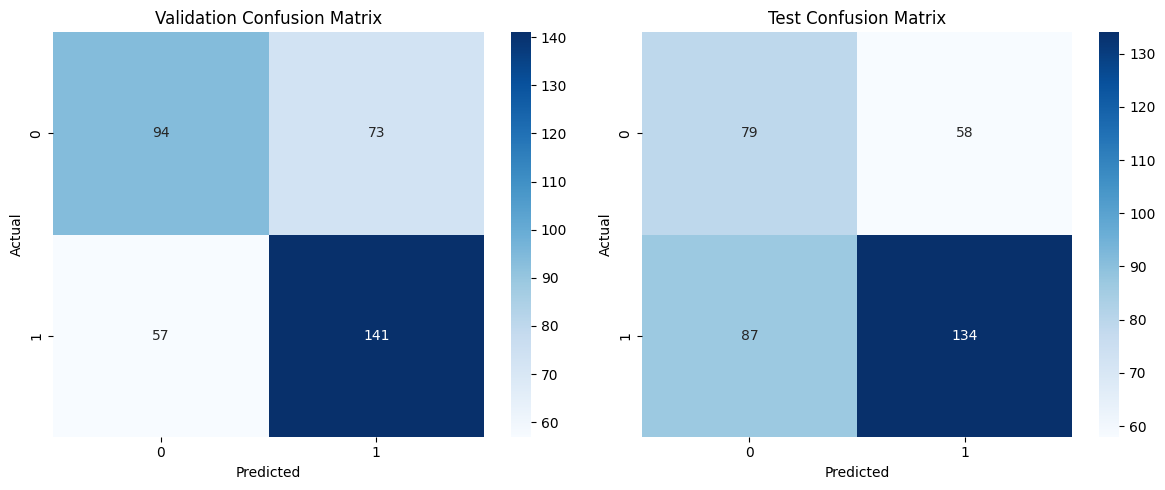

In [1141]:
# Compute Confusion Matrices
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot Side-by-Side 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Validation Confusion Matrix
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Validation Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Test Confusion Matrix
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Test Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### Feature Importance

In [1142]:
best_model.feature_importances_

array([4.08159572e-02, 8.12231697e-02, 2.92392023e-02, 2.83277086e-02,
       3.07214385e-02, 3.69884277e-02, 4.77072593e-02, 5.06432911e-02,
       5.02010689e-02, 4.70570895e-02, 2.55636502e-02, 3.38052526e-02,
       2.44246511e-02, 2.64849986e-02, 3.61529339e-02, 2.87679655e-02,
       1.45079349e-02, 1.69729111e-02, 2.83810352e-02, 2.39821876e-03,
       2.79589189e-03, 4.46355829e-03, 2.27028624e-03, 6.20614203e-04,
       5.54324001e-04, 1.96926601e-03, 2.78533084e-03, 1.14646980e-03,
       2.32710385e-04, 8.68482710e-04, 1.16421276e-03, 5.79619180e-05,
       1.63486814e-02, 2.75071809e-02, 2.54941530e-02, 4.98279136e-02,
       4.36109029e-02, 7.05870456e-02, 3.72069848e-02, 3.01038642e-02])

In [1143]:
feat_imp_rf_df = pd.DataFrame(
    {
        'feature': X_train_df.columns,
        'feature_importance': best_model.feature_importances_
     }
)

In [1144]:
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf_df.head(40)

,feature,feature_importance
0,daylight_duration,0.081223
1,day_of_year_cos,0.070587
2,soil_moisture_0_to_7cm_mean,0.050643
3,soil_moisture_28_to_100cm_mean,0.050201
4,week_cos,0.049828
5,dew_point_2m_mean,0.047707
6,soil_moisture_7_to_28cm_mean,0.047057
7,day_of_year_sin,0.043611
8,temperature_2m_mean,0.040816
9,wind_direction_sin,0.037207


In [1145]:
alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

In [1146]:
# Sort and select top 20 features
top20_feat_imp_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).head(20)

# Plot top 20 features with title
chart = alt.Chart(top20_feat_imp_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y('feature', sort='-x'),
    tooltip=['feature', 'feature_importance']
).properties(
    title='Top 20 Feature Importances from Random Forest'
)

chart

alt.Chart(...)

In [1147]:
# Feature selection 
selected_features = feat_imp_rf_df[
    feat_imp_rf_df['feature_importance'] > 0.035
]['feature'].tolist()

X_train_df_selected_features = X_train_df[selected_features]
X_val_df_selected_features = X_val_df[selected_features]
X_test_df_selected_features = X_test_df[selected_features]

In [1148]:
# # Set up the parameter grid 
param_grid = {
    'class_weight': ['balanced'],
    'n_estimators': [800],   
    'max_depth': [5],                  
    'min_samples_split': [3],               
    'min_samples_leaf': [10],                  
    'max_features': ['sqrt'],          
}

# param_grid = {
#     'class_weight': ['balanced', {0: 2, 1: 1}, {0: 3, 1: 1}, {0: 2.5, 1: 1}],
#     'n_estimators': [100, 200, 300, 400, 700, 800, 900],        # Number of trees in the forest
#     'max_depth': [4, 5, 6, 7, 8, 9, 10],                   # Max depth of each tree
#     'min_samples_split': [2, 3, 4, 5, 6, 7, 8],                 # Minimum samples to split an internal node
#     'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],         # Minimum samples required to be at a leaf node
#     'max_features': ['auto', 'sqrt', 'log2'],                   # Number of features to consider at each split
# }

In [1149]:
# Time series cross validation
tscv = TimeSeriesSplit(n_splits=5)

# Grid search
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=34),
    param_grid=param_grid,
    cv=tscv,
    scoring='f1', 
    n_jobs=-1,     
)

# Fit grid search
grid_search.fit(X_train_df_selected_features, y_train)

# Best parameters
print(f"\nBest parameters: {grid_search.best_params_}")
print(f"Best cross-validation F1 score: {grid_search.best_score_:.4f}")


Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 800}
Best cross-validation F1 score: 0.6249


In [1150]:
best_model_selected_features = grid_search.best_estimator_

In [1151]:
# Training
y_train_pred = get_predictions(best_model_selected_features, X_train_df_selected_features)
print(classification_metrics(y_train, y_train_pred))

{'Accuracy': 0.6523592085235921, 'Precision': np.float64(0.6940389294403893), 'Recall': np.float64(0.6410112359550562), 'F1_score': np.float64(0.6664719626168224)}


In [1152]:
csi_score = critical_success_index(y_train, y_train_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.50


In [1153]:
# Validation
y_val_pred = get_predictions(best_model_selected_features, X_val_df_selected_features)
print(classification_metrics(y_val, y_val_pred))

{'Accuracy': 0.6602739726027397, 'Precision': np.float64(0.6813725490196079), 'Recall': np.float64(0.702020202020202), 'F1_score': np.float64(0.6915422885572139)}


In [1154]:
csi_score = critical_success_index(y_val, y_val_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.53


In [1155]:
# Testing
y_test_pred = get_predictions(best_model_selected_features, X_test_df_selected_features)
print(classification_metrics(y_test, y_test_pred))

{'Accuracy': 0.6005586592178771, 'Precision': np.float64(0.7119565217391305), 'Recall': np.float64(0.5927601809954751), 'F1_score': np.float64(0.6469135802469136)}


In [1156]:
csi_score = critical_success_index(y_test, y_test_pred)
print(f"Critical Success Index (CSI): {csi_score:.2f}")

Critical Success Index (CSI): 0.48


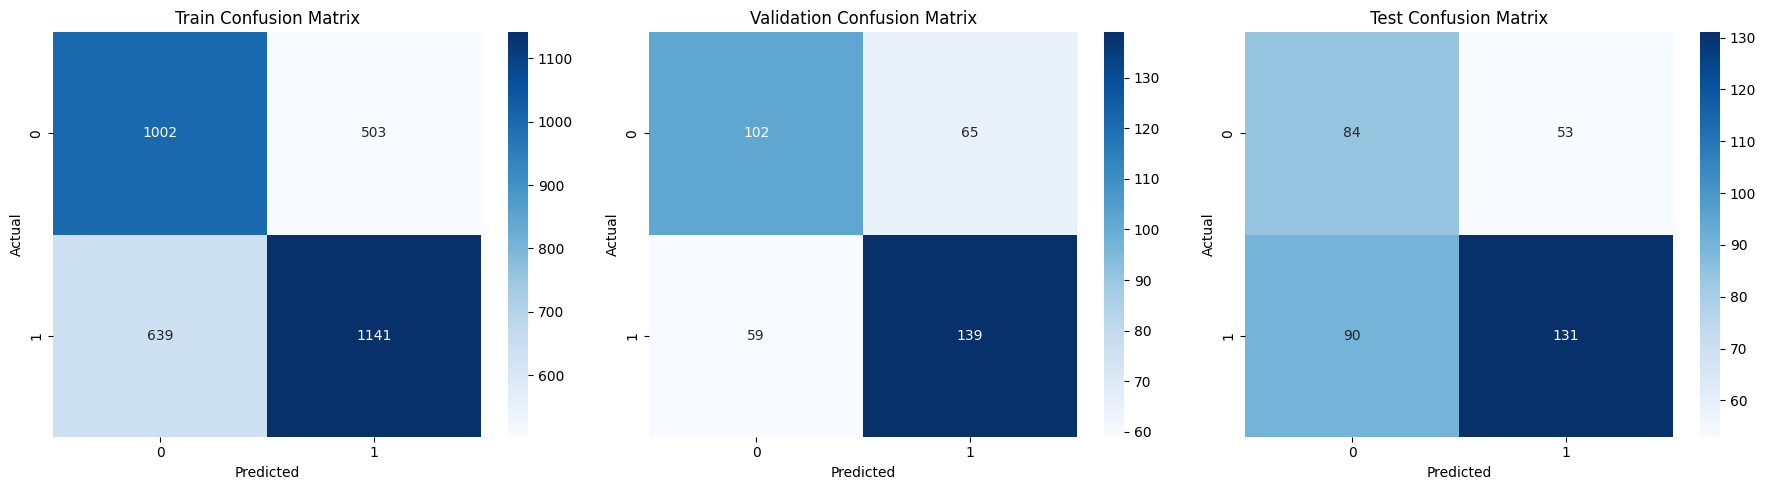

In [1157]:
# Compute Confusion Matrices
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_val = confusion_matrix(y_val, y_val_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot Side-by-Side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train Confusion Matrix
sns.heatmap(conf_matrix_train, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Train Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Validation Confusion Matrix
sns.heatmap(conf_matrix_val, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Validation Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Test Confusion Matrix
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Test Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()

In [1158]:
# Save model
import os
from joblib import dump

save_dir = '../../models/rain_or_not'  # correct relative path

os.makedirs(save_dir, exist_ok=True)  # just to be safe

dump(best_model_selected_features, os.path.join(save_dir, 'rain_or_not.joblib'))

['../../models/rain_or_not/rain_or_not.joblib']

In [1175]:
model_performance_explanations = """The Random Forest model with feature selection demonstrates consistent performance on the training and validation datasets, achieving balanced precision and recall, with F1 scores around 66–69% and CSI values between 0.50 and 0.53. This indicates effective detection of rain events while managing false positives and negatives. However, on the test dataset, both recall and CSI decline, reflecting a reduced sensitivity to actual rain events and challenges in generalising to new data. This drop in performance is likely influenced by shifts in data distribution over time. Notably, the lower recall can be attributed in part to differences in class distribution between the training/validation datasets and the test dataset, where changes in the proportion of rain events make it more difficult for the model to consistently identify these minority events. Despite this, precision remains high, indicating that when the model predicts rain, it is usually accurate, though some rain events may be missed.
"""

In [1176]:
# Do not modify this code
print_tile(size="h3", key='model_performance_explanations', value=model_performance_explanations)

### J.5 Business Impact from Current Model Performance

> Provide some analysis on the model impacts from the business point of view


In [1177]:
business_impacts_explanations = """The Random Forest model with feature selection shows reasonable predictive performance with balanced precision and recall on training and validation datasets, suggesting it can reliably detect rain events most of the time. However, the decline in recall on the test dataset indicates that the model misses a significant number of actual rain events in real-world, future scenarios. From a business perspective, false negatives (missed rain events) can have serious consequences. For example, if the model is used to inform agricultural planning, outdoor event management, or logistics, failing to predict rain could lead to inadequate preparations, resulting in crop damage, event cancellations, or disrupted deliveries. These impacts often carry higher costs than false positives, where rain is predicted but does not occur. False positives, while potentially causing some unnecessary precaution, generally lead to less severe financial or operational repercussions compared to missed rain events. The relatively high precision indicates that when rain is predicted, it is usually correct, reducing unnecessary disruptions. However, the model's lower recall on unseen data suggests the business should be cautious about over-relying on predictions without considering additional sources or safety margins, especially since class imbalance and distribution shifts can affect the model’s ability to detect rain consistently.
"""

In [1178]:
# Do not modify this code
print_tile(size="h3", key='business_impacts_explanations', value=business_impacts_explanations)

## H. Project Outcomes

In [1179]:
experiment_outcome = """Null Hypothesis Partially Confirmed"""

In [1180]:
# Do not modify this code
print_tile(size="h2", key='experiment_outcomes_explanations', value=experiment_outcome)

In [1181]:
experiment_results_explanations = """The null hypothesis is partially confirmed: the Random Forest model with feature selection demonstrates strong and balanced performance on the training and validation datasets, but its reduced recall and CSI on the test dataset reveal challenges in generalising to unseen data, likely due to class imbalance and distribution shifts. Compared to the dummy model, which suffers from very low precision and produces many false alarms, the Random Forest model strikes a much better balance between precision and recall, making it more practical for business use. Given this, deploying the Random Forest model with feature selection into production is justified, but should be done cautiously. Continuous monitoring and regular retraining are essential to address evolving data patterns and improve sensitivity to rain events. Meanwhile, further experimentation with feature engineering, handling class imbalance, and integrating external data or weather-related models can help enhance performance over time, ensuring the model delivers sustained business value while minimising costly false negatives.
"""

In [1182]:
# Do not modify this code
print_tile(size="h2", key='experiment_results_explanations', value=experiment_results_explanations)